# **Adam Optimizer Implementation**

---


## **Import Necessary Libraries**


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

## **Load the Data**


In [56]:
data = pd.read_csv("./Data/Multivariables_LR_Data.csv")

In [57]:
data.head()

,X1,X2,X3,y
0,73.0,80.0,75.0,152.0
1,93.0,88.0,93.0,185.0
2,89.0,91.0,90.0,180.0
3,96.0,98.0,100.0,196.0
4,73.0,66.0,70.0,142.0


In [58]:
data.shape

(25, 4)

## **Define Variables 𝑋 and 𝑦**


In [59]:
X = data.drop("y", axis=1).values
X = np.insert(X, 0, 1, axis=1)

y = data["y"].values.reshape(-1, 1)

## **Plot Loss Function**


In [60]:
def plot_loss(loss, title="Loss over Updates", color="r", marker="o"):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(loss)), loss, f"{marker}-{color}", label="Loss")
    plt.title(title)
    plt.xlabel(f"Epochs (Total: {len(loss)})")
    plt.ylabel("Loss (J(θ))")
    plt.legend()
    plt.tight_layout()
    plt.show()

---


## **Adam Gradient Descent**

#### **Adam Gradient Descent Key Formulas**

**1.First moment (exponentially decaying average of gradients)**

$$
m_{(t)} = \beta_1 \, m_{(t-1)} + (1 - \beta_1) \, \nabla J(\theta_{(t)})
$$


**2.Second moment (exponentially decaying average of squared gradients)**

$$
v_{(t)} = \beta_2 \, v_{(t-1)} + (1 - \beta_2) \, \left( \nabla J(\theta_{(t)}) \right)^2
$$


**3.Bias-corrected moments**

$$
\hat{m}_{(t)} = \frac{m_{(t)}}{1 - \beta_1^t}
$$

$$
\hat{v}_{(t)} = \frac{v_{(t)}}{1 - \beta_2^t}
$$


**4.Parameter update**

$$
\theta_{(t+1)} = \theta_{(t)} - \frac{\alpha}{\sqrt{\hat{v}_{(t)}} + \epsilon} \, \hat{m}_{(t)}
$$


**Explanation of Symbols**

| Symbol                      | Meaning                                          |
| --------------------------- | ------------------------------------------------ |
| $\theta_{(t)}$           | Parameter vector at iteration $t$              |
| $\nabla J(\theta_{(t)})$ | Gradient of cost function at $\theta_{(t)}$   |
| $m_{(t)}$                | First moment (mean of gradients)                 |
| $v_{(t)}$                | Second moment (uncentered variance of gradients) |
| $\hat{m}_{(t)}$          | Bias-corrected first moment                      |
| $\hat{v}_{(t)}$          | Bias-corrected second moment                     |
| $\alpha$                  | Learning rate                                    |
| $\beta_1$                | Decay rate for first moment (e.g., 0.9)          |
| $\beta_2$                | Decay rate for second moment (e.g., 0.999)       |
| $\epsilon$                | Small constant to avoid division by zero         |
| $J(\theta)$               | Cost function (e.g., Mean Squared Error)         |

---


In [61]:
import numpy as np

def adam_gradient_descent(
    X,
    y,
    learning_rate=1e-2,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-8,
    max_iterations=100,
    gradient_tol=1e-2,
    loss_threshold=0.01,
    verbose=False,
    print_every=10,
):
    """
    Adam Gradient Descent Optimizer.

    Args:
        X (np.ndarray): Feature matrix (m, n)
        y (np.ndarray): Target vector (m, 1)
        learning_rate (float): Learning rate (alpha)
        beta1 (float): Decay rate for 1st moment
        beta2 (float): Decay rate for 2nd moment
        epsilon (float): Small constant to prevent division by zero
        max_iterations (int): Maximum number of iterations
        gradient_tol (float): Gradient norm threshold for convergence
        loss_threshold (float): Loss change threshold for convergence
        verbose (bool): Whether to print detailed logs
        print_every (int): Print frequency

    Returns:
        theta (np.ndarray): Final parameter values
        losses (list): List of loss values during training
    """
    m, n = X.shape
    theta = np.zeros((n, 1))
    m_t = np.zeros((n, 1))  # 1st moment
    v_t = np.zeros((n, 1))  # 2nd moment
    losses = []

    for i in range(1, max_iterations + 1):
        # Compute predictions and error
        h_X = X @ theta
        error = h_X - y

        # Compute cost
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        losses.append(cost)

        # Gradient
        gradient = (1 / m) * (X.T @ error)
        gradient_norm = np.linalg.norm(gradient)

        # Update biased first moment
        m_t = beta1 * m_t + (1 - beta1) * gradient

        # Update biased second raw moment
        v_t = beta2 * v_t + (1 - beta2) * (gradient ** 2)

        # Bias correction
        m_hat = m_t / (1 - beta1 ** i)
        v_hat = v_t / (1 - beta2 ** i)

        # Update parameters
        theta -= (learning_rate / (np.sqrt(v_hat) + epsilon)) * m_hat

        # Verbose output
        if verbose and (i % print_every == 0 or i == max_iterations):
            print(f" Iteration {i} ".center(60, "—"))
            print(f"Predictions [h(x) = Xθ]:\n {h_X.ravel()}")
            print(f"Error vector [e = h(x) - y]:\n {error.ravel()}")
            print(f"Cost function [J(θ) = (1/2m) * Σ(e²)]: {cost:.6f}")
            print(f"Gradient [▽J(θ) = (1/m) * Σ(ex)]:\n {gradient.ravel()}")
            print(f"Gradient norm: {gradient_norm:.6f}")
            print(f"First moment [m(t) = β₁ * m(t-1) + (1 - β₁) * ∇J(θ(t))]:\n {m_t.ravel()}")
            print(f"Second moment [v(t) = β₂ * v(t-1) + (1 - β₂) * (∇J(θ(t)))²]:\n {v_t.ravel()}")
            print(f"Bias-corrected first moment [m̂(t) = m(t) / (1 - β₁^t)]:\n {m_hat.ravel()}")
            print(f"Bias-corrected second moment [v̂(t) = v(t) / (1 - β₂^t)]:\n {v_hat.ravel()}")
            print(f"Updated parameters [θ(t+1) = θ(t) - (α / (√v̂(t) + ε)) * m̂(t)]:\n {theta.ravel()}\n")

        # Check convergence
        if gradient_norm < gradient_tol:
            print(f"Converged by gradient norm at iteration {i}")
            break
        if i > 1 and abs(losses[-1] - losses[-2]) < loss_threshold:
            print(f"Converged by loss change at iteration {i}")
            break

    return theta, losses

In [62]:
final_theta, adam_loss = adam_gradient_descent(
    X,
    y,
    learning_rate=0.01,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-8,
    max_iterations=1000,
    gradient_tol=0.01,
    loss_threshold=0.01,
    verbose=True,
    print_every=10
)

print("Final theta:", final_theta.ravel())

——————————————————————— Iteration 10 ———————————————————————
Predictions [h(x) = Xθ]:
 [20.51906441 24.64079928 24.28238686 26.43285743 18.81660996 13.8884517
 19.80224324 14.69487855 23.02794834 21.32549507 19.08541947 18.81661169
 25.08881213 20.87747464 19.89184645 24.99921161 19.89184215 23.74477155
 23.92397407 21.41509289 23.20715374 23.11755063 22.13191845 20.69826819
 25.53682771]
Error vector [e = h(x) - y]:
 [-131.48093559 -160.35920072 -155.71761314 -169.56714257 -123.18339004
  -87.1115483  -129.19775676 -100.30512145 -151.97205166 -142.67450493
 -121.91458053 -122.18338831 -158.91118787 -131.12252536 -128.10815355
 -167.00078839 -127.10815785 -159.25522845 -153.07602593 -137.58490711
 -153.79284626 -151.88244937 -152.86808155 -128.30173181 -166.46317229]
Cost function [J(θ) = (1/2m) * Σ(e²)]: 10073.008699
Gradient [▽J(θ) = (1/m) * Σ(ex)]:
 [  -140.44569959 -11333.01631023 -11394.82163334 -11673.86420286]
Gradient norm: 19863.988753
First moment [m(t) = β₁ * m(t-1) + (1 - β

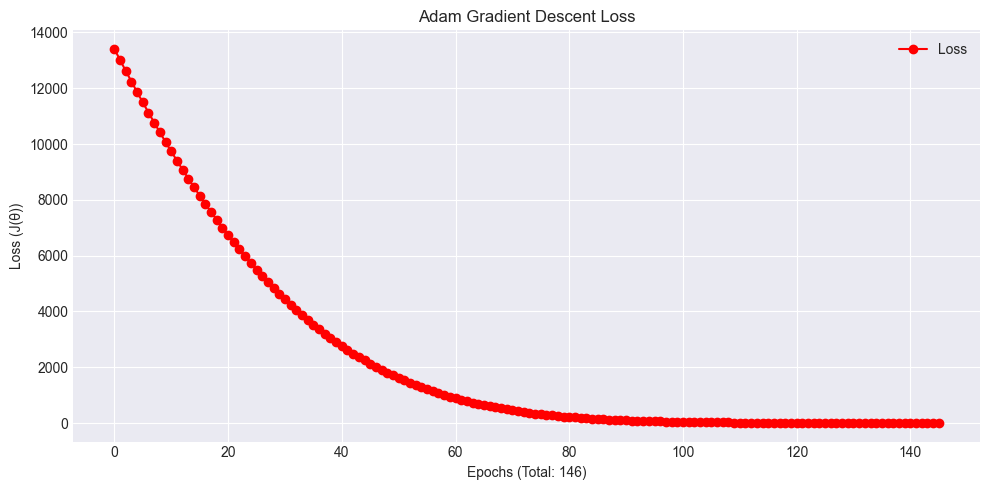

In [63]:
plot_loss(adam_loss, title="Adam Gradient Descent Loss")

---